## Project On the Home Credit Model

Objective: As banks look for the custmoer eligibility for how munch amount should be Granted. 

<img src="home-credit.jpg" style="height:320px">

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("G:\\A6\\home-credit-default-risk\\application_train.csv")

In [3]:
# list of Variable names
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [6]:
# Dimension of the dataset
df.shape

(307511, 122)

### Pre-processing 
#### Step 1 : Memory_management

In [7]:
def memory_management(train_identity):
    """ iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage."""

    df=train_identity
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print("*******************************************************************************************")
    train_identity=df
    return df

In [8]:
# size reduced for df and named as df1
df1=memory_management(df)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 59.54 MB
Decreased by 79.2%
*******************************************************************************************


### Step 2: null_values treatment

In [9]:
def null_values(base_dataset):
    print(base_dataset.isna().sum())
    ## null value percentage     
    null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100
    ## null value percentage beyond threshold drop , else treat the columns 
    
    retained_columns=null_value_table[null_value_table<int(input())].index
    # if any variable as null value greater than input(like 30% of the data) value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>int(input())].index
    base_dataset.drop(drop_columns,axis=1,inplace=True)
    len(base_dataset.isna().sum().index)
    cont=base_dataset.describe().columns
    cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
    print(base_dataset.isna().sum())
    return base_dataset,cat,cont

In [10]:
df2,cat,cont=null_values(df1)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

The above code is for null value treatmeant and here we give 30 value for categorical and numercial variable as null value treatment. Means Above 30% value of have empty value we drop that variable and any varible below 30% empty value or no null value in any variable are taken as consider for the analysis

In [11]:
# A list of string variable
cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [12]:
# A list of numerical varaible
cont

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

### using sample data

In [13]:
df2.shape

(307511, 72)

In [14]:
df3=df2.sample(10000)

In [15]:
df3.shape

(10000, 72)

### Step 2: Outlier Treatment

In [17]:
def outliers_transform(base_dataset):
    for i in base_dataset.var().sort_values(ascending=False).index[1:10]:
        x=np.array(base_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        base_dataset[i]=y

In [18]:
outliers_transform(df3)

### Step 3: LabelEncoder

###### Now we are converting string value to numerical value for all the variable in the dataset

In [19]:
from sklearn.preprocessing import LabelEncoder
def label_encoders(data,cat):
    le=LabelEncoder()
    for i in cat:
        le.fit(data[i])
        x=le.transform(data[i])
        data[i]=x
    return data

In [20]:
df4=label_encoders(df3,cat)

## Create a base model by taking all variable in the model.

In [21]:
y=df4['AMT_CREDIT']
x=df4.drop('AMT_CREDIT',axis=1)

And in the above code we are taking the variable y(dependent) and x(Independent) for our analysis.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,random_state=120,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 71) (2000, 71) (8000,) (2000,)


In the above code we have split the data into train and test. The output of 1st is for train and 2nd is test

In [23]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X_train,y_train)
ln.predict(X_test)

array([693096.96689273, 415469.40692014, 602546.11117523, ...,
       661955.93759959, 164081.71965699, 260497.99755064])

We are predict the y variable values.

In [24]:
# for understanding we are printing the top5 predicted value 
P=ln.predict(X_test)
Pr=pd.DataFrame(P)
Pr.head(10)

,0
0,6.930970e+05
1,4.154694e+05
2,6.025461e+05
3,4.442312e+05
4,7.434430e+05
5,7.480552e+05
6,3.369303e+05
7,6.803749e+05
8,8.471273e+05
9,1.110948e+06


In [25]:
coef_table=pd.DataFrame([ln.coef_,X_test.columns,ln.get_params()]).T

In [27]:
coef_table.columns=['coeff','columns','Name']

# for better look
coef_b=pd.DataFrame(coef_table)
coef_b

,coeff,columns,Name
0,-0.0170805,SK_ID_CURR,copy_X
1,-4036.28,TARGET,fit_intercept
2,-44282.6,NAME_CONTRACT_TYPE,n_jobs
3,-7203.68,CODE_GENDER,normalize
4,-6661.36,FLAG_OWN_CAR,None
5,-5674.72,FLAG_OWN_REALTY,None
6,-2276.5,CNT_CHILDREN,None
7,0.0952272,AMT_INCOME_TOTAL,None
8,6.72113,AMT_ANNUITY,None
9,0.868506,AMT_GOODS_PRICE,None


In [28]:
# Top 5 
coef_table.sort_values("coeff").head()

,coeff,columns,Name
63,-163403,FLAG_DOCUMENT_20,None
52,-92714,FLAG_DOCUMENT_9,None
2,-44282.6,NAME_CONTRACT_TYPE,n_jobs
60,-35979.3,FLAG_DOCUMENT_17,None
49,-33236.1,FLAG_DOCUMENT_6,None


In [29]:
# Bottom 5
coef_table.sort_values("coeff").tail()

,coeff,columns,Name
56,62806.4,FLAG_DOCUMENT_13,None
15,149843,REGION_POPULATION_RELATIVE,None
62,184016,FLAG_DOCUMENT_19,None
58,189245,FLAG_DOCUMENT_15,None
50,392807,FLAG_DOCUMENT_7,None


In [30]:
# r square value
ln.score(X_train,y_train)

0.8065620561424718

#### Interpretation of R squre: From the R squre value we can say that model is good fit.
$Note$: The R-square value is nothing but the variance explained in the dependent variable by inculding all the variables together

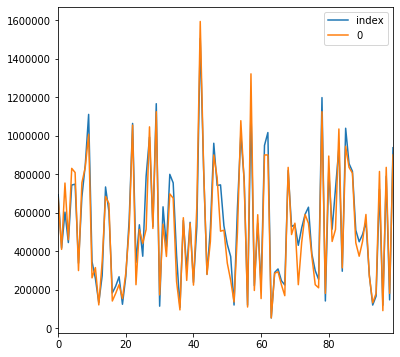

In [35]:
import matplotlib.pyplot as plt
predicted=ln.predict(X_test)
actual=list(y_test.values)

act_pred=pd.DataFrame(actual[0:100],predicted[0:100]).reset_index()
act_pred.plot(figsize=(6,6))

The graph shows the actual vs predict value and our model is predict very near to actual value 

## Stats Models Interpretations

In [36]:
import statsmodels.api as sm
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             AMT_CREDIT   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     625.9
Date:                Sat, 09 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:08:34   Log-Likelihood:            -1.3363e+05
No. Observations:               10000   AIC:                         2.674e+05
Df Residuals:                    9933   BIC:                         2.679e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
SK_ID_CURR        

#### Interpretation: By refereing above summary table

* R-squared: As the basemodel is give us R square 81%, means the basemodel is able explain 81% variation in the model and 19% of the variation are unexplained

* Adj. R-squared: As the basemodel is give us Adj.R square 81%, means the basemodel is able explain 19% variation in the model and 19% of the variation are unexplained
    As per the R square and Adj.R squre it's good model.
    
    $Note$:In the base model we got 81% seems to be suspicious, it may be a overfit or multicollinearity.  
* As the P-value is less than 5% and we have enough evidence to reject the null hypothesis. Hence there is a significant      impact i.e, The model as some predictive power to explian the variation.

The F-test, tells whether there is at least one variable in the model that has a significant impact on the dependent variable. The value of F test should high.

* Coefficent 1: An increase of one unit in TARGET, we expect to decrease of AMT_CREDIT to -2719.5928 units.
    
    As follows for other coefficents

###### Testing of Hypothesis

Let see the beta coefficients, the F-test uses them to test the prediction power of a model. If at least one beta coefficient is not equal to zero, then we can conclude that presence of one independent variable in the model that has a significant effect on the dependent variable y which can expilan variation in y. If more than one beta is nonzero, it indicates the presence of multiple independent variables that can explain the variations in y. If one beta is positive, you can conclude that the model has some prediction power.

H0: b1 = b2 = b3 = b4 = b5 = b6 ..... = bn = 0 :means that the variable xi has no impact on dependent variable y

H1: b1 != b2 != ....!= bn !=0 (to saying that at least one b1 != 0.) :mean that the variable xi has some significant impact on     the dependent variable and dropping xi would badly effect your model

* If the P-value of the F-test is less than 5 percent, then you reject the null hypothesis H0, that means the model can be used for useful predictions.
* If the F-test has a P-value greater than 5 percent, then you don’t have sufficient evidence to reject H0, then the model as no predictions power to explian y or model is insignificant.

In simple terms, look at the P-value of the T-test; if it is greater than 5 percent, then your variable is in trouble and you may need drop it. If the P-value less than 5 percent,there is no reason to worry, and you can keep the variable in your model and proceed with further analysis.

From the parameter estimates table if we see the p value of some variable as < 5% and some as > 5% level of significance. 
The variable which as p-value less than 5% then we keep the those variable further analysis and the variable which as greater than 5% then we drop those variable, because the variable as no effects on y which can explain the variation of dependent variable.

And now we use some well know methods to remove the insignificant variable by using below methods.
* Stepwise selection
* Forward selection
* Backward selection
* P-value selection


#### Method 1: Forward selection

#### Method 2: Backward selection

#### Method 3: Stepwise selection

##### Method 4: P-value method

#### P value Method

In [39]:
#list of pvalues for all the variables
res.pvalues.sort_values()

SK_ID_CURR                      3.489444e-01
TARGET                          6.333013e-01
NAME_CONTRACT_TYPE              2.232828e-04
CODE_GENDER                     8.924347e-03
FLAG_OWN_CAR                    2.098081e-01
FLAG_OWN_REALTY                 1.685055e-01
CNT_CHILDREN                    5.139754e-01
AMT_INCOME_TOTAL                8.110075e-04
AMT_ANNUITY                    1.876915e-257
AMT_GOODS_PRICE                 0.000000e+00
NAME_TYPE_SUITE                 1.246207e-01
NAME_INCOME_TYPE                3.215310e-01
NAME_EDUCATION_TYPE             6.949766e-01
NAME_FAMILY_STATUS              8.934158e-01
NAME_HOUSING_TYPE               7.026375e-01
REGION_POPULATION_RELATIVE      1.042507e-01
DAYS_BIRTH                      1.322048e-02
DAYS_EMPLOYED                   7.481362e-02
DAYS_REGISTRATION               5.879231e-01
DAYS_ID_PUBLISH                 9.971602e-01
FLAG_MOBIL                      3.030420e-01
FLAG_EMP_PHONE                  7.895293e-02
FLAG_WORK_

In [40]:
# sort the pvalue
Pvalue=pd.DataFrame(res.pvalues)[0].sort_values(ascending=False)
Pvalue.columns=['Variable_Name','P-value']
Pvalue=pd.DataFrame(Pvalue)

In [41]:
# Take only pvalue have > 5% of variables to remove from the model
Premove=Pvalue[Pvalue[0] > 0.05].index
Premove

Index(['DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'FLAG_DOCUMENT_5', 'NAME_FAMILY_STATUS',
       'FLAG_DOCUMENT_17', 'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_HOUSING_TYPE',
       'NAME_EDUCATION_TYPE', 'TARGET', 'FLAG_CONT_MOBILE',
       'LIVE_CITY_NOT_WORK_CITY', 'DAYS_REGISTRATION', 'FLAG_DOCUMENT_21',
       'DAYS_LAST_PHONE_CHANGE', 'REG_CITY_NOT_LIVE_CITY', 'CNT_CHILDREN',
       'LIVE_REGION_NOT_WORK_REGION', 'CNT_FAM_MEMBERS',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'SK_ID_CURR', 'NAME_INCOME_TYPE',
       'FLAG_MOBIL', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_8', 'EXT_SOURCE_2',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_OWN_CAR',
       'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_10', 'FLAG_OWN_REALTY',
       'REG_REGION_NOT_LIVE_REGION', 'FLAG_PHONE', 'DEF_60_CN

###### Above is the list of the column which as Pvalue greater than 5% and which we can remove this variable

### Model validation

In [37]:
# for the base model
pred=ln.predict(X_test)
actual=y_test.values
def model_validation(pred,actual):
    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
    y_pred=ln.predict(X_test)
    return mean_absolute_error(y_test.values,y_pred) ,r2_score(y_test.values,ln.predict(X_test)),mean_squared_error(y_test.values,y_pred)

In [38]:
model_validation(pred,actual)

(82449.76713061114, 0.8029742946161089, 23737712607.24089)